In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

from keras import backend as K

from skimage import io
import os, random

In [2]:
filname = './fer2013/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('./fer2013/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

emotion                                             pixels     usage
0  emotion                                             pixels     Usage
1        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
2        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
3        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
4        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
5        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
6        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...  Training
7        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...  Training
8        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...  Training
9        3  85 84 90 121 101 102 133 153 153 169 177 189 1...  Training

In [3]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [4]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [5]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [7]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(96, (11, 11), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(384, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(384, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(384, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    
    return model
model=my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 96)        11712     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 256)       614656    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 384)       885120    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 384)       1536      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 384)       0

In [9]:
path_model='model_filter.h5' # save model at this location after each epoch
K.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,0.001) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=32, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
1010/1010 [==============================] - 3430s 3s/step - loss: 1.8495 - accuracy: 0.2797 - val_loss: 1.9299 - val_accuracy: 0.2513
Epoch 2/20
1010/1010 [==============================] - 2842s 3s/step - loss: 1.4504 - accuracy: 0.4421 - val_loss: 1.3435 - val_accuracy: 0.4829
Epoch 3/20
1010/1010 [==============================] - 3487s 3s/step - loss: 1.2393 - accuracy: 0.5302 - val_loss: 1.3114 - val_accuracy: 0.4985
Epoch 4/20
1010/1010 [==============================] - 3698s 4s/step - loss: 1.0724 - accuracy: 0.5991 - val_loss: 1.2128 - val_accuracy: 0.5514
Epoch 5/20
1010/1010 [==============================] - 2967s 3s/step - loss: 0.9178 - accuracy: 0.6603 - val_loss: 1.1733 - val_accuracy: 0.5684
Epoch 6/20
1010/1010 [==============================] - 3192s 3s/step - loss: 0.7233 - accuracy: 0.7386 - val_loss: 1.1849 - val_accuracy: 0.5690
Epoch 7/20
1010/1010 [==============================] - 3208s 3s/step - loss: 0.5460 - accuracy: 0.8087 - val_loss: 1.2507 -

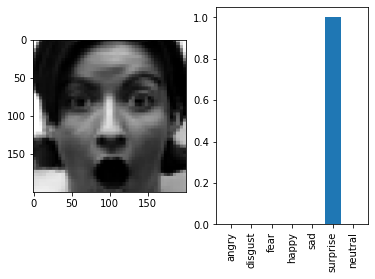

Expression Prediction: surprise


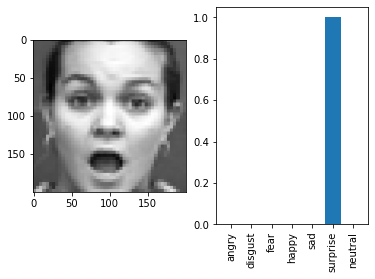

Expression Prediction: surprise


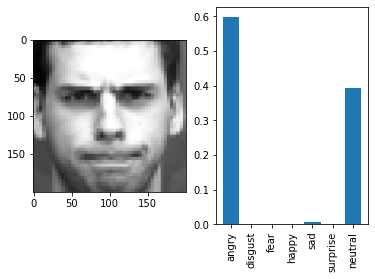

Expression Prediction: angry


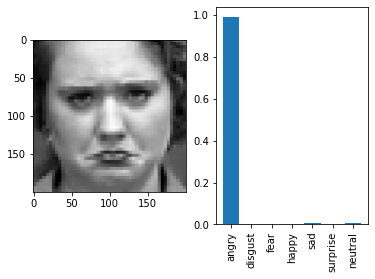

Expression Prediction: angry


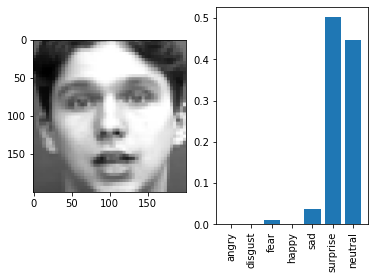

Expression Prediction: surprise


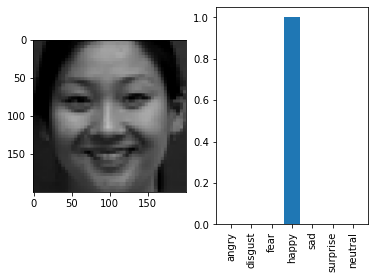

Expression Prediction: happy


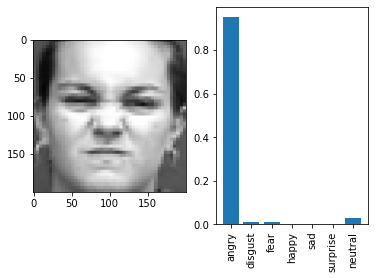

Expression Prediction: angry


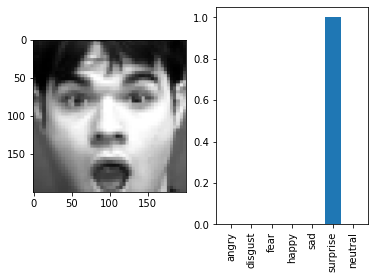

Expression Prediction: surprise


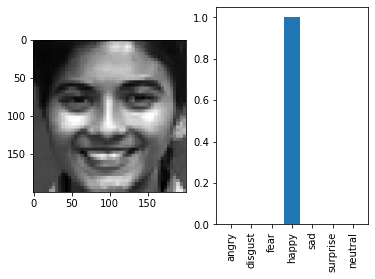

Expression Prediction: happy


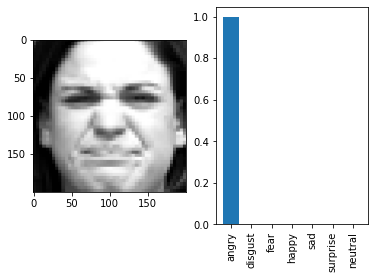

Expression Prediction: angry


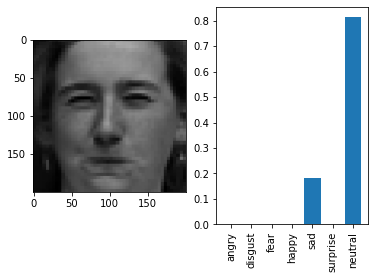

Expression Prediction: neutral


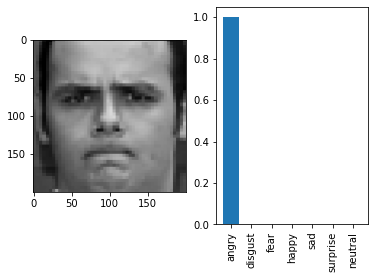

Expression Prediction: angry


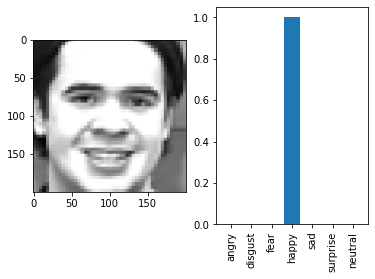

Expression Prediction: happy


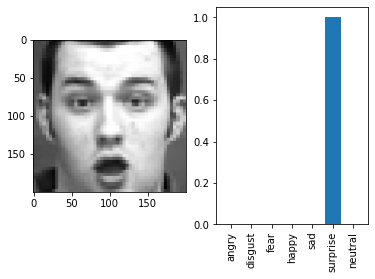

Expression Prediction: surprise


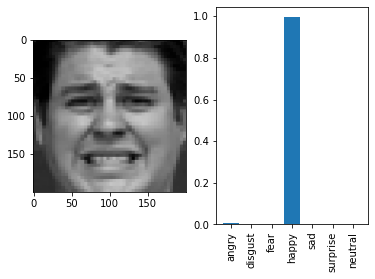

Expression Prediction: happy


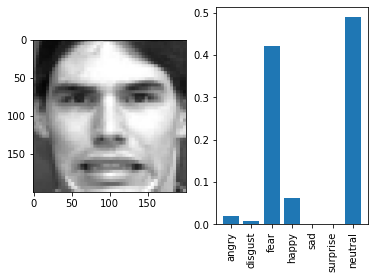

Expression Prediction: neutral


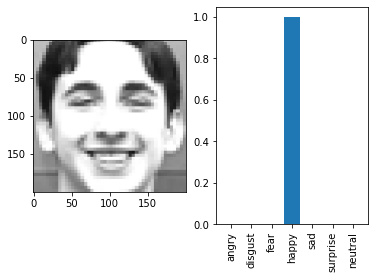

Expression Prediction: happy


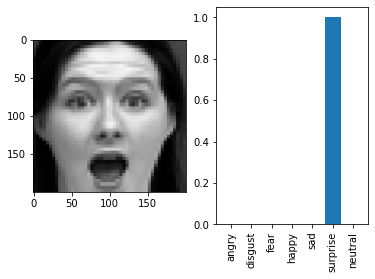

Expression Prediction: surprise


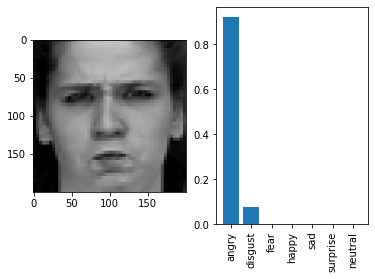

Expression Prediction: angry


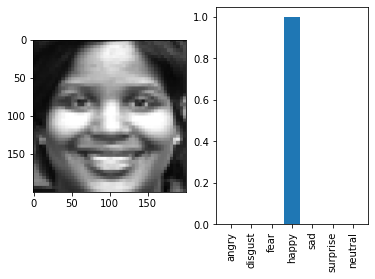

Expression Prediction: happy


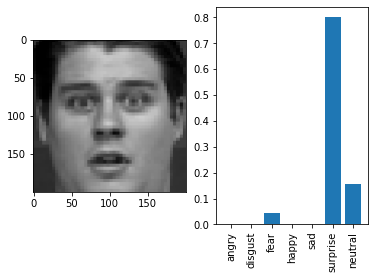

Expression Prediction: surprise


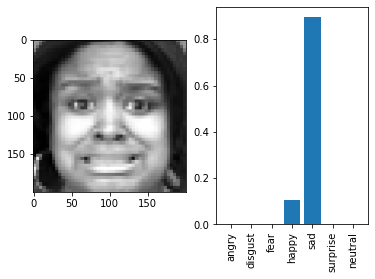

Expression Prediction: sad


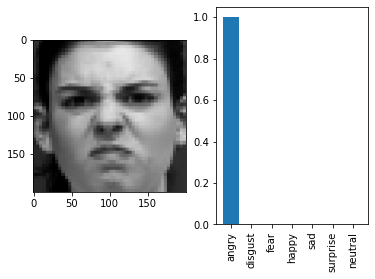

Expression Prediction: angry


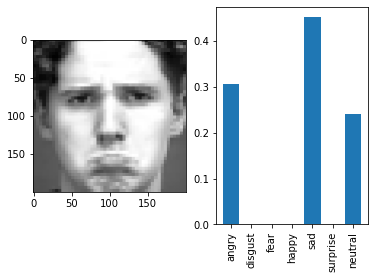

Expression Prediction: sad


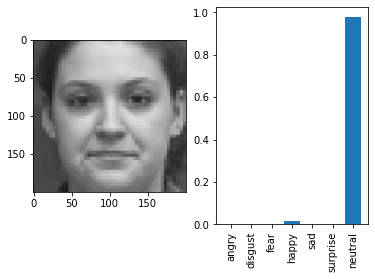

Expression Prediction: neutral


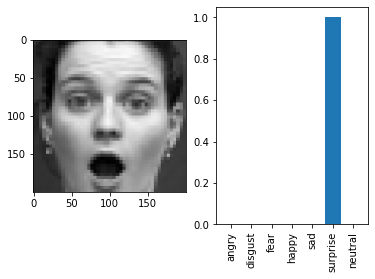

Expression Prediction: surprise


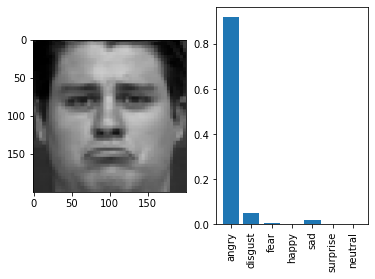

Expression Prediction: angry


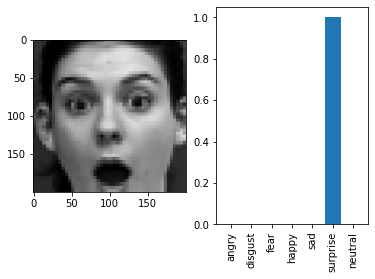

Expression Prediction: surprise


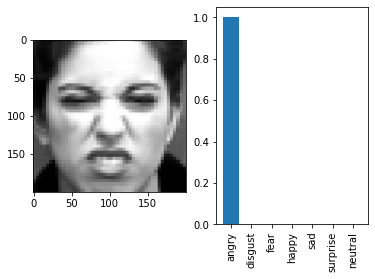

Expression Prediction: angry


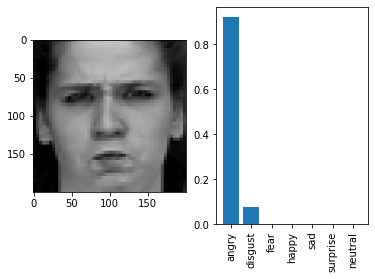

Expression Prediction: angry


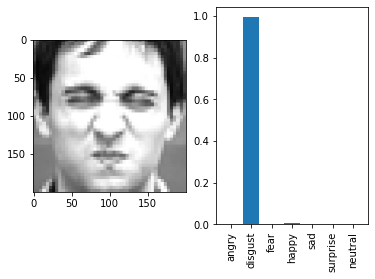

Expression Prediction: disgust


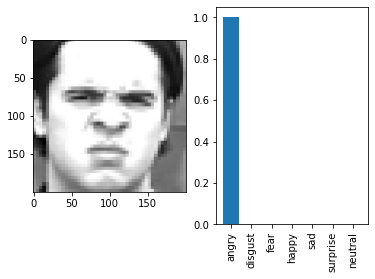

Expression Prediction: angry


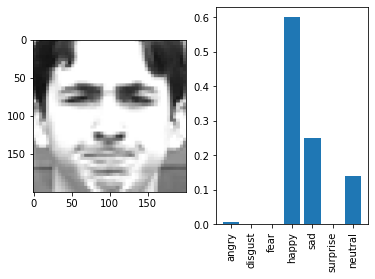

Expression Prediction: happy


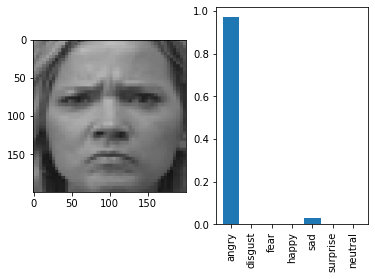

Expression Prediction: angry


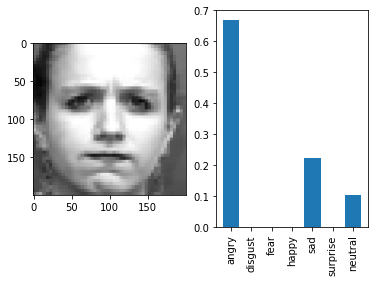

Expression Prediction: angry


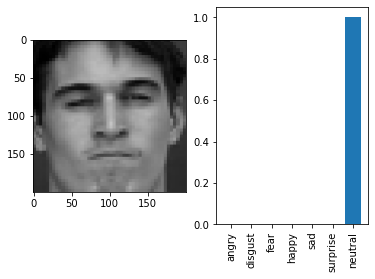

Expression Prediction: neutral


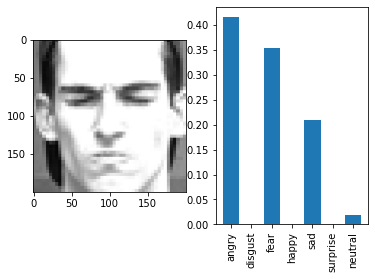

Expression Prediction: angry


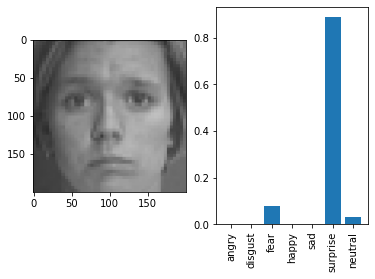

Expression Prediction: surprise


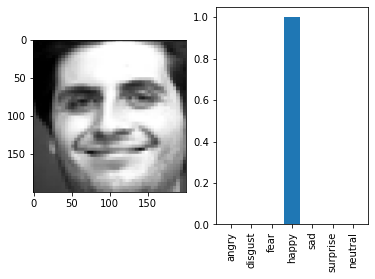

Expression Prediction: happy


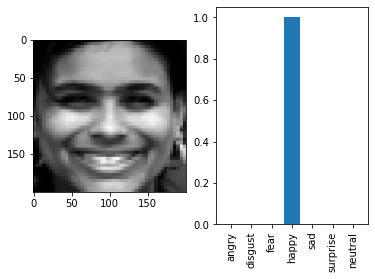

Expression Prediction: happy


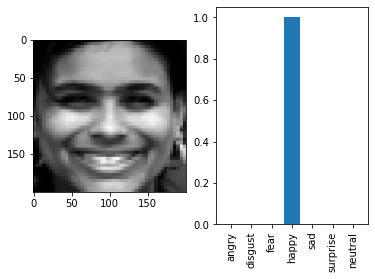

Expression Prediction: happy


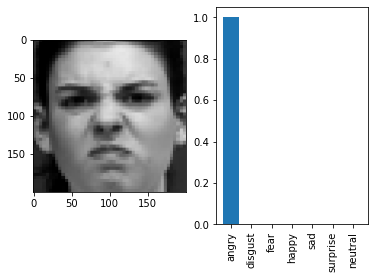

Expression Prediction: angry


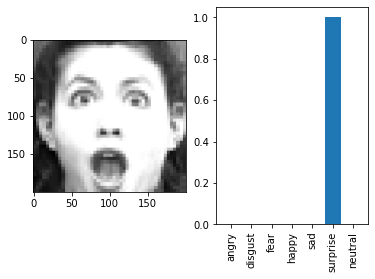

Expression Prediction: surprise


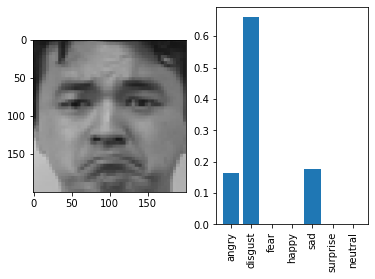

Expression Prediction: disgust


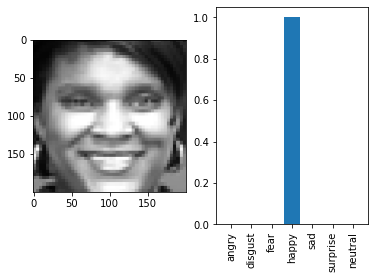

Expression Prediction: happy


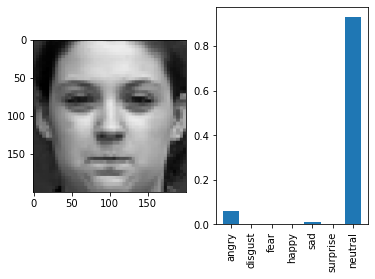

Expression Prediction: neutral


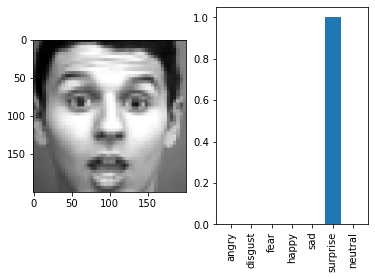

Expression Prediction: surprise


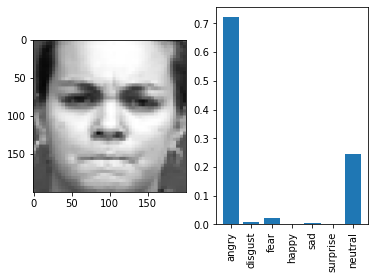

Expression Prediction: angry


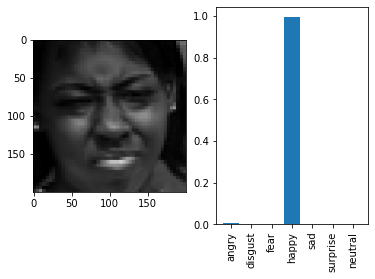

Expression Prediction: happy


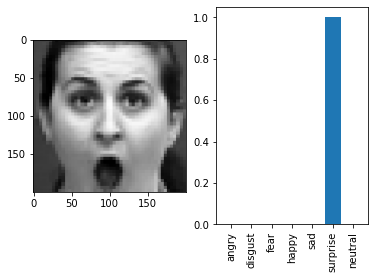

Expression Prediction: surprise


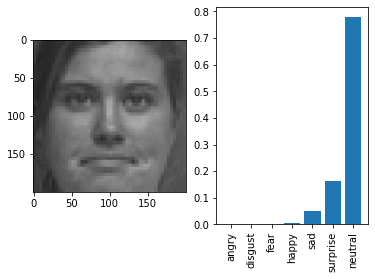

Expression Prediction: neutral


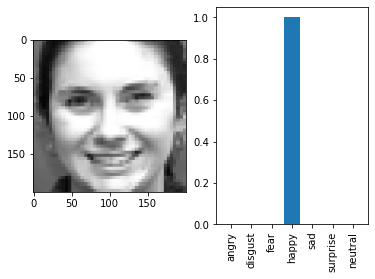

Expression Prediction: happy


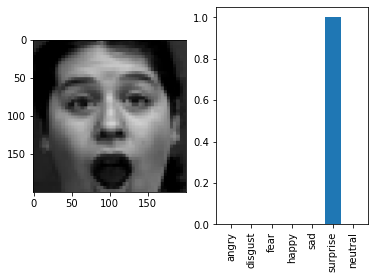

Expression Prediction: surprise


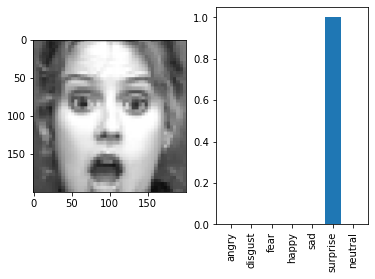

Expression Prediction: surprise


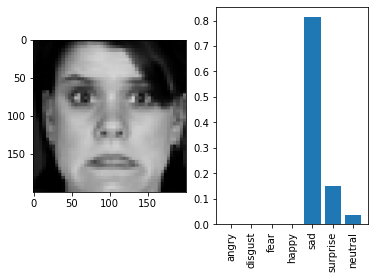

Expression Prediction: sad


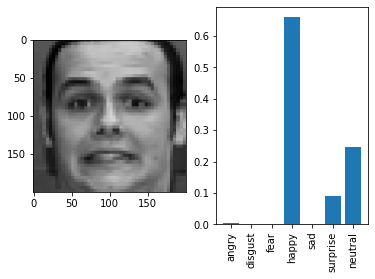

Expression Prediction: happy


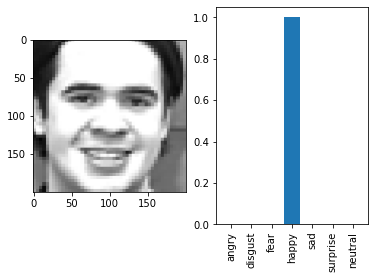

Expression Prediction: happy


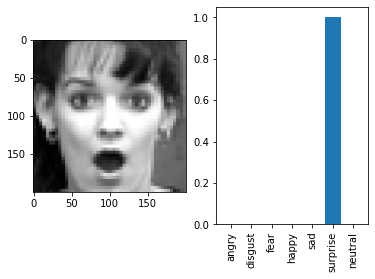

Expression Prediction: surprise


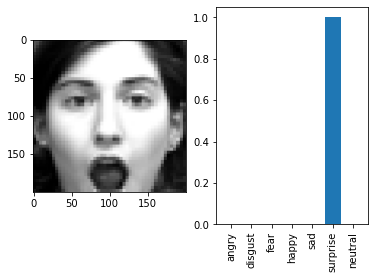

Expression Prediction: surprise


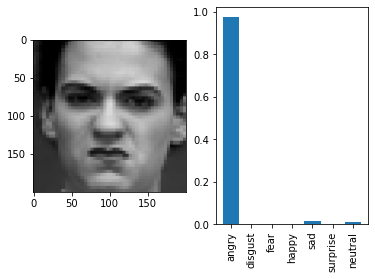

Expression Prediction: angry


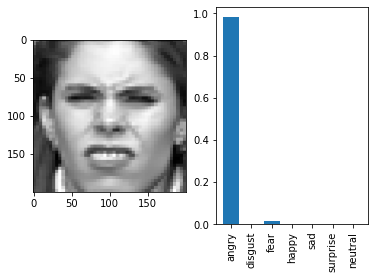

Expression Prediction: angry


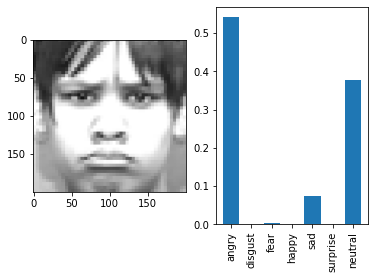

Expression Prediction: angry


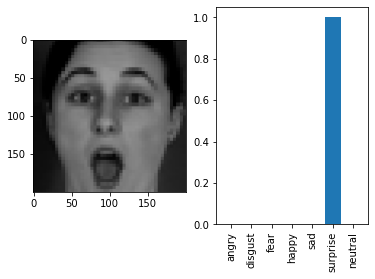

Expression Prediction: surprise


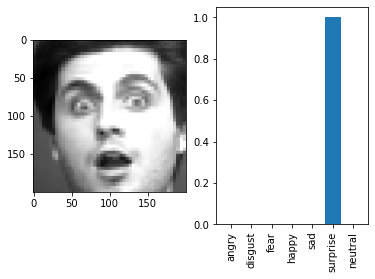

Expression Prediction: surprise


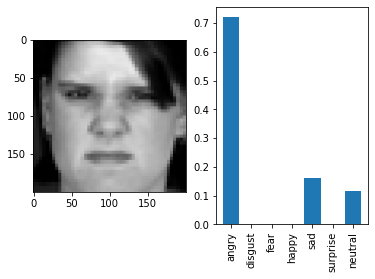

Expression Prediction: angry


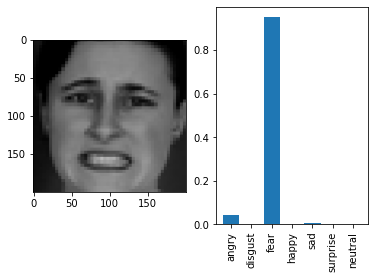

Expression Prediction: fear


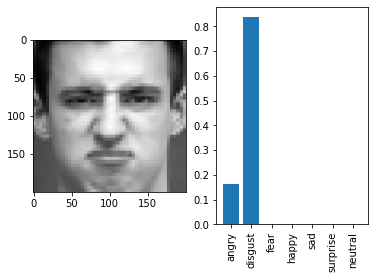

Expression Prediction: disgust


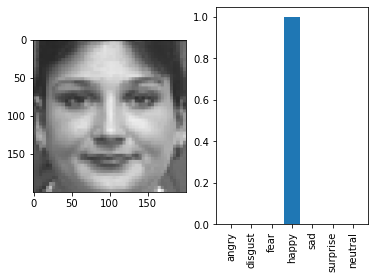

Expression Prediction: happy


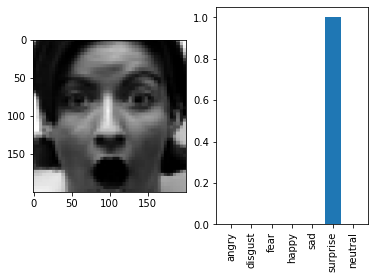

Expression Prediction: surprise


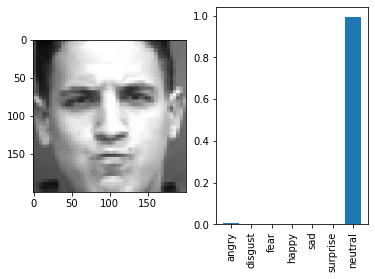

Expression Prediction: neutral


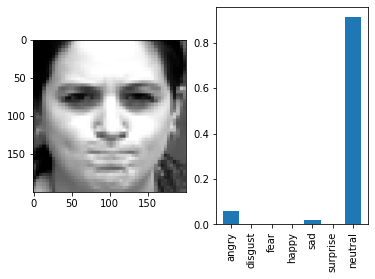

Expression Prediction: neutral


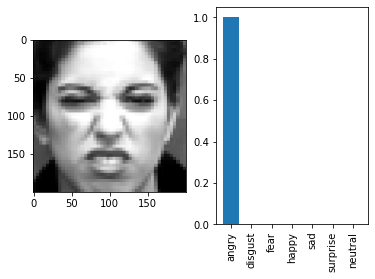

Expression Prediction: angry


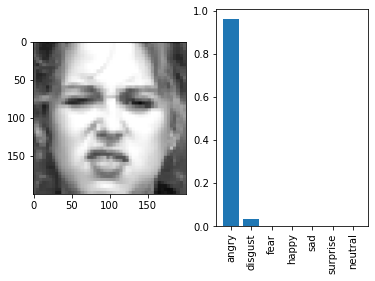

Expression Prediction: angry


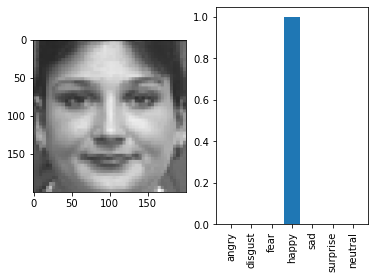

Expression Prediction: happy


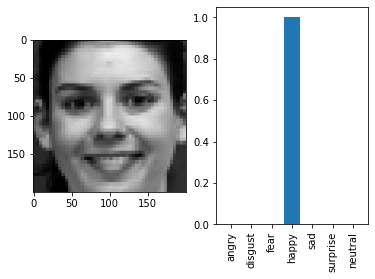

Expression Prediction: happy


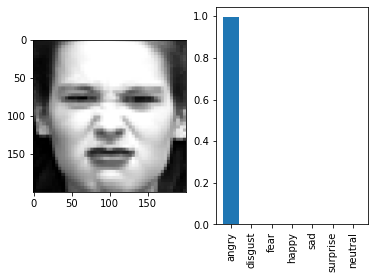

Expression Prediction: angry


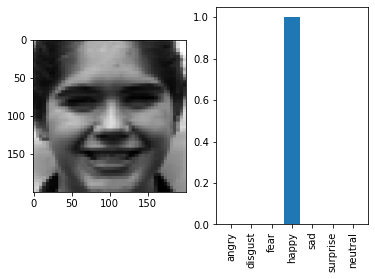

Expression Prediction: happy


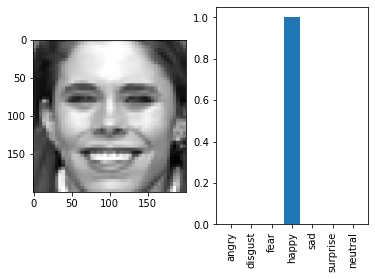

Expression Prediction: happy


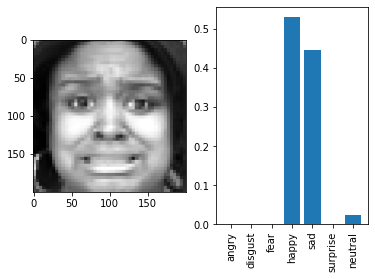

Expression Prediction: happy


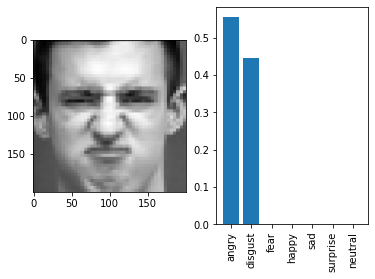

Expression Prediction: angry


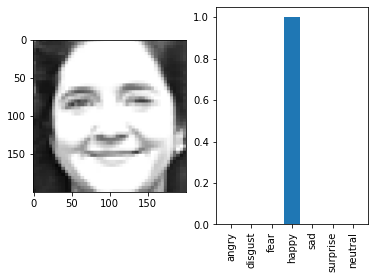

Expression Prediction: happy


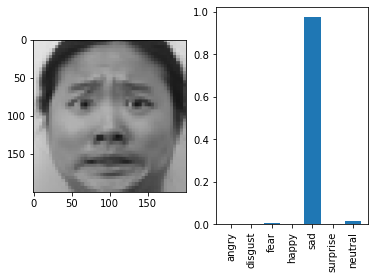

Expression Prediction: sad


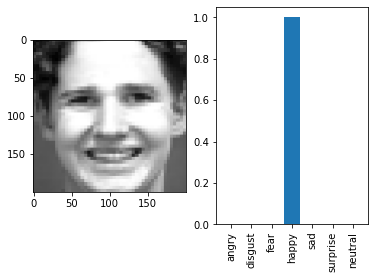

Expression Prediction: happy


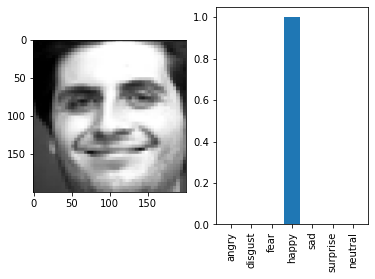

Expression Prediction: happy


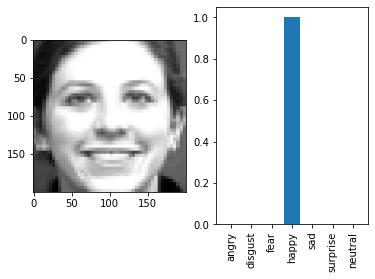

Expression Prediction: happy


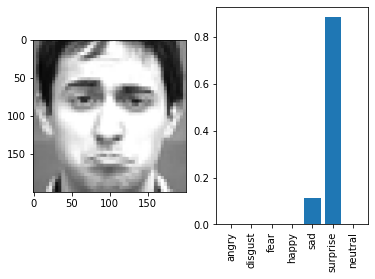

Expression Prediction: surprise


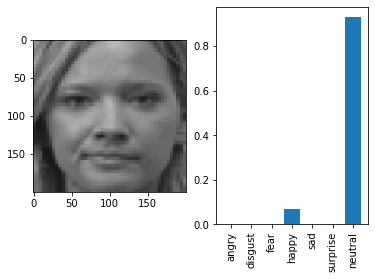

Expression Prediction: neutral


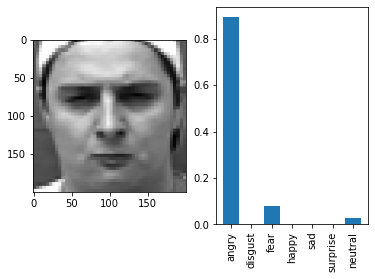

Expression Prediction: angry


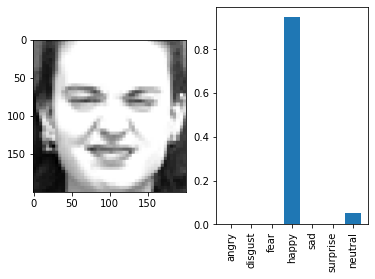

Expression Prediction: happy


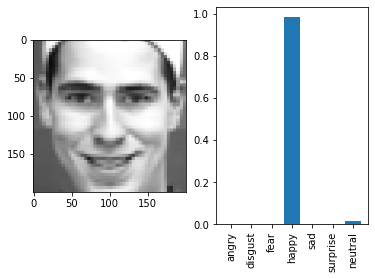

Expression Prediction: happy


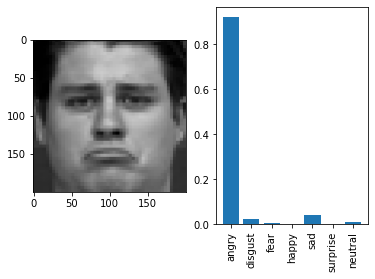

Expression Prediction: angry


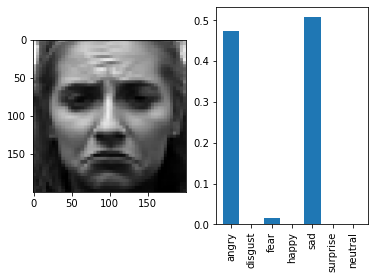

Expression Prediction: sad


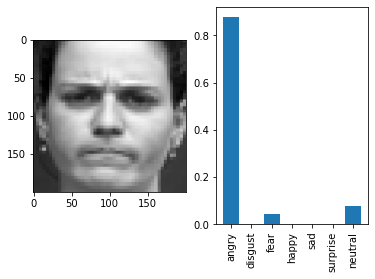

Expression Prediction: angry


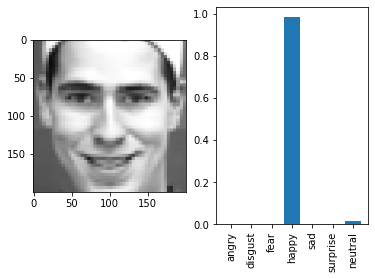

Expression Prediction: happy


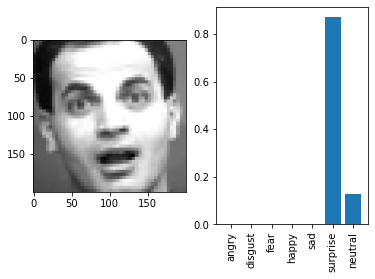

Expression Prediction: surprise


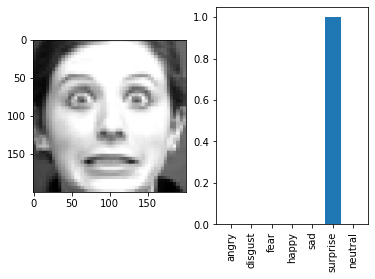

Expression Prediction: surprise


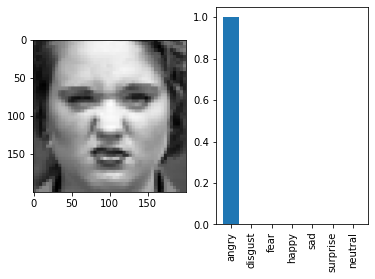

Expression Prediction: angry


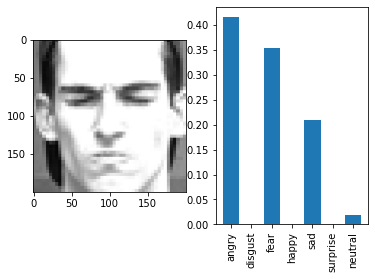

Expression Prediction: angry


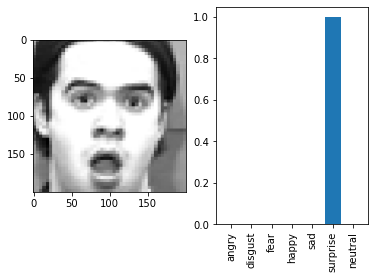

Expression Prediction: surprise


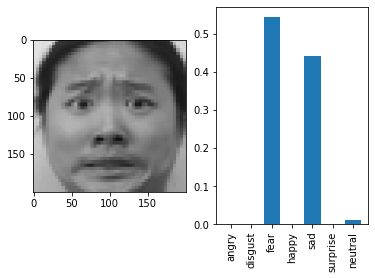

Expression Prediction: fear


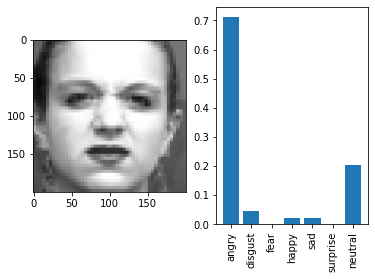

Expression Prediction: angry


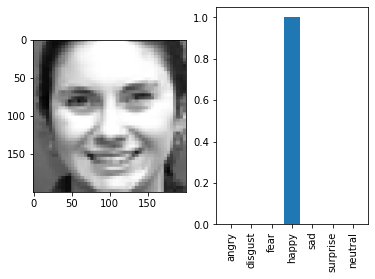

Expression Prediction: happy


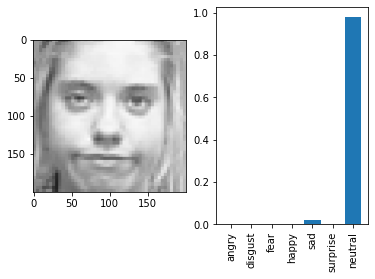

Expression Prediction: neutral


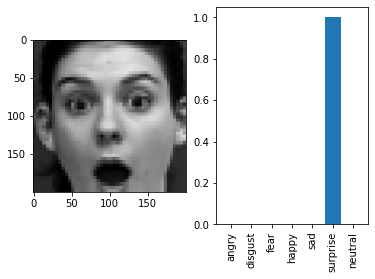

Expression Prediction: surprise


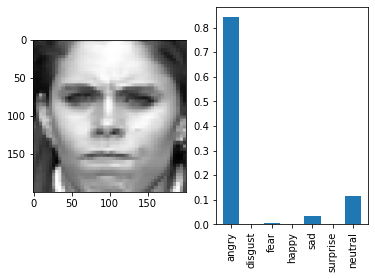

Expression Prediction: angry


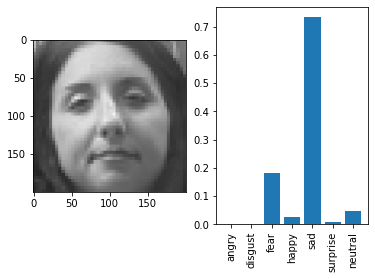

Expression Prediction: sad


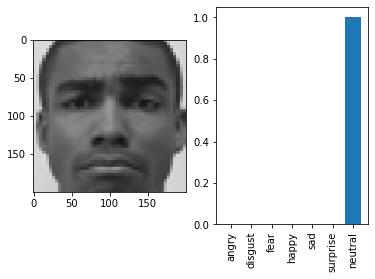

Expression Prediction: neutral


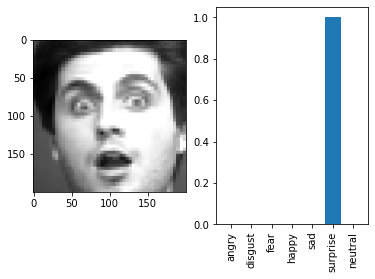

Expression Prediction: surprise


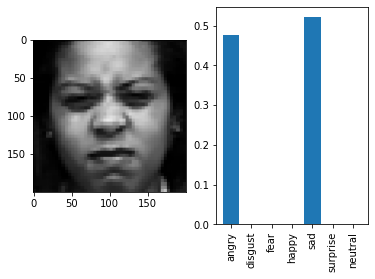

Expression Prediction: sad


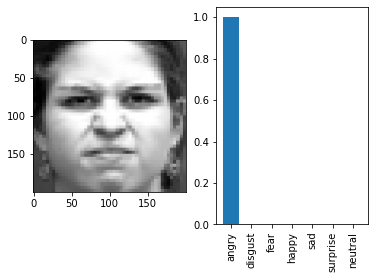

Expression Prediction: angry


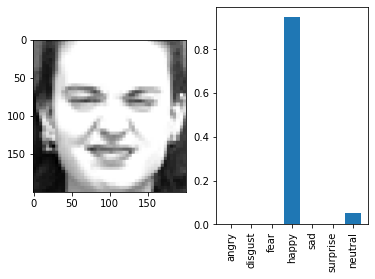

Expression Prediction: happy


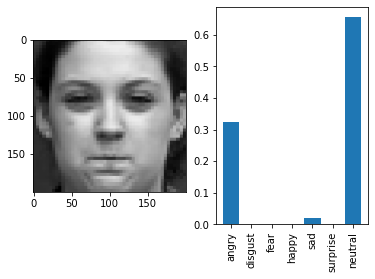

Expression Prediction: neutral


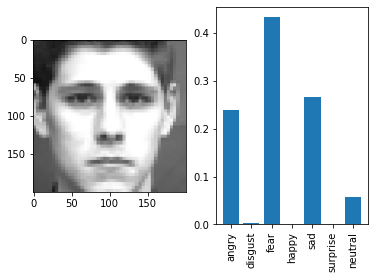

Expression Prediction: fear


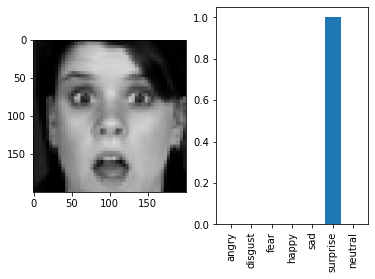

Expression Prediction: surprise


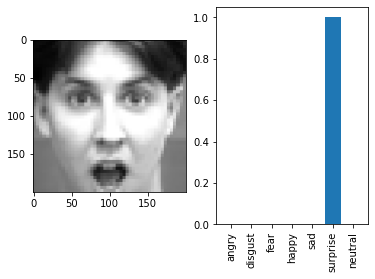

Expression Prediction: surprise


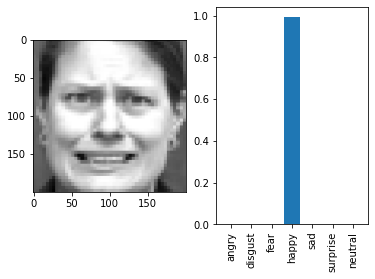

Expression Prediction: happy


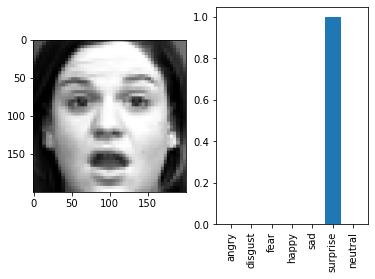

Expression Prediction: surprise


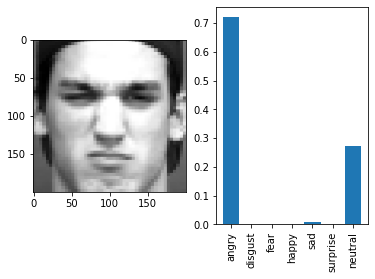

Expression Prediction: angry


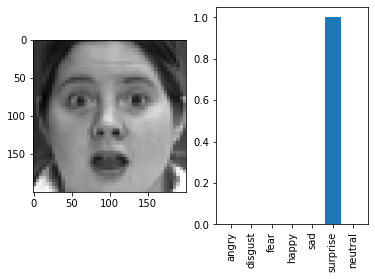

Expression Prediction: surprise


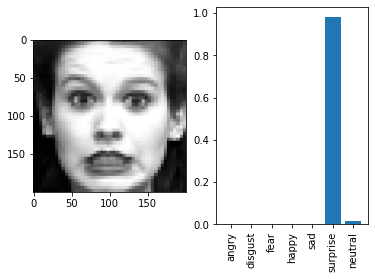

Expression Prediction: surprise


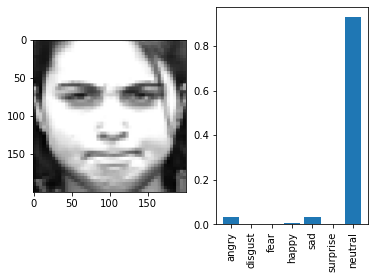

Expression Prediction: neutral


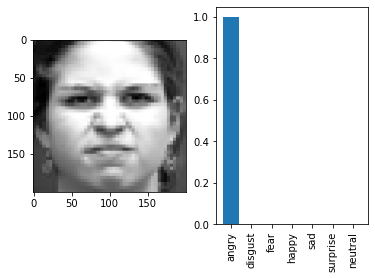

Expression Prediction: angry


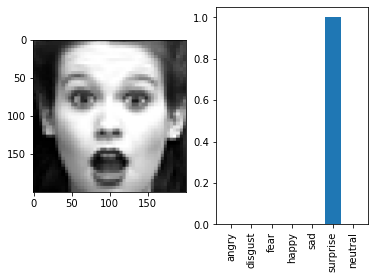

Expression Prediction: surprise


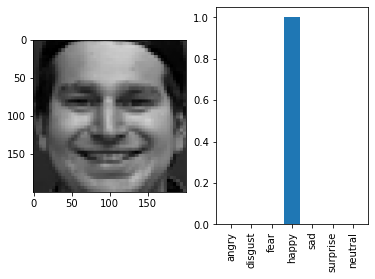

Expression Prediction: happy


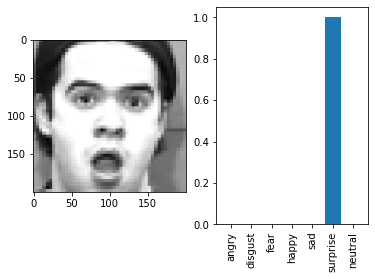

Expression Prediction: surprise


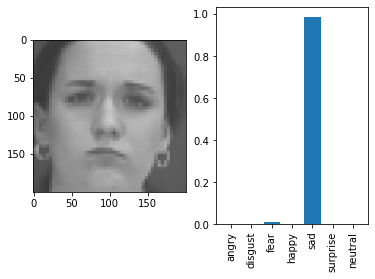

Expression Prediction: sad


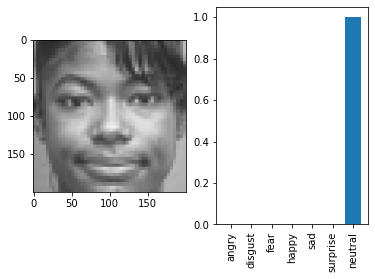

Expression Prediction: neutral


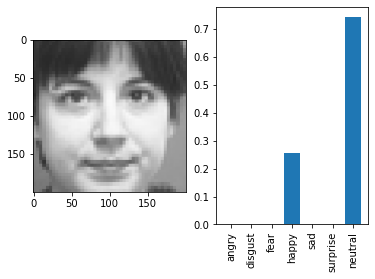

Expression Prediction: neutral


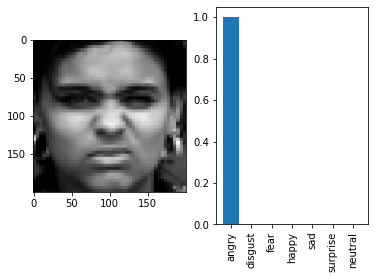

Expression Prediction: angry


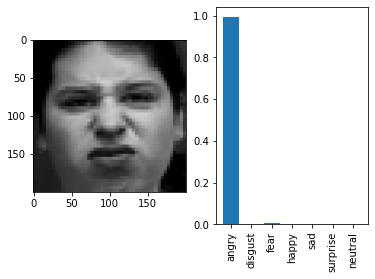

Expression Prediction: angry


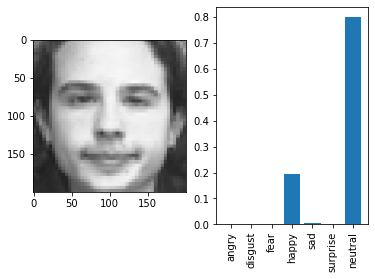

Expression Prediction: neutral


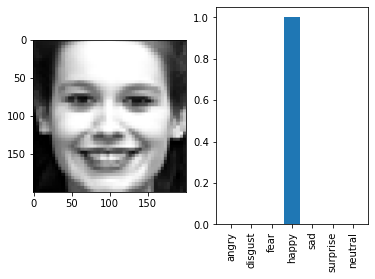

Expression Prediction: happy


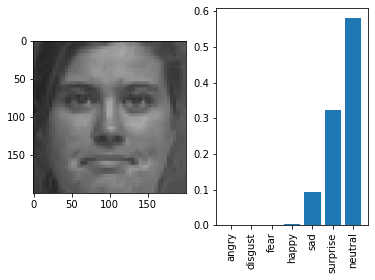

Expression Prediction: neutral


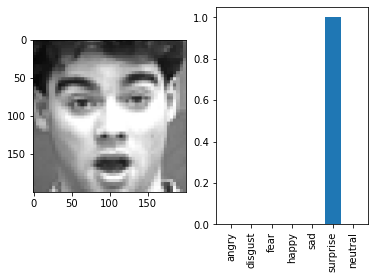

Expression Prediction: surprise


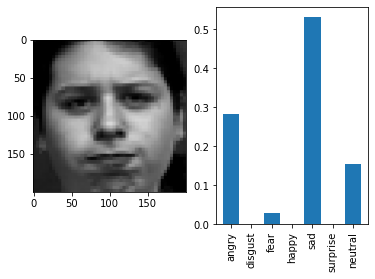

Expression Prediction: sad


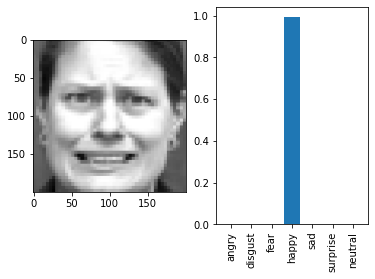

Expression Prediction: happy


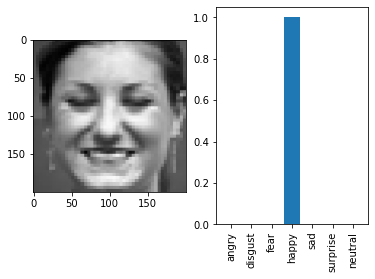

Expression Prediction: happy


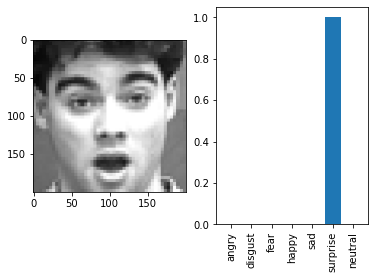

Expression Prediction: surprise


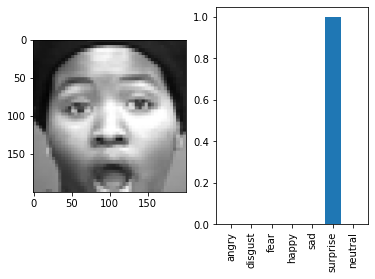

Expression Prediction: surprise


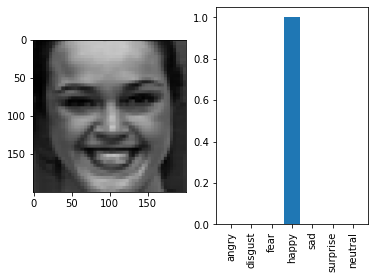

Expression Prediction: happy


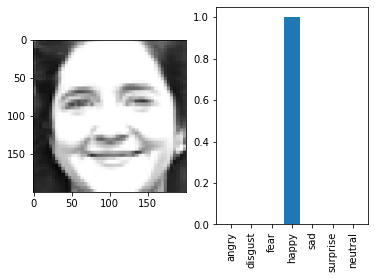

Expression Prediction: happy


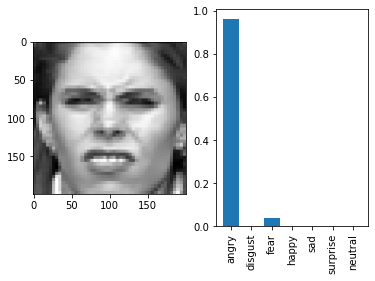

Expression Prediction: angry


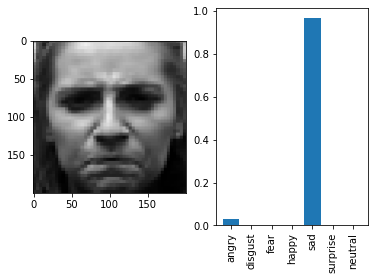

Expression Prediction: sad


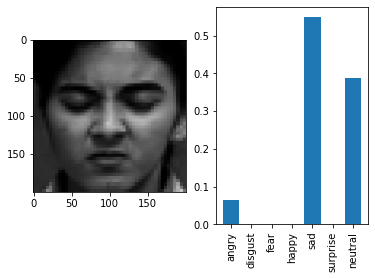

Expression Prediction: sad


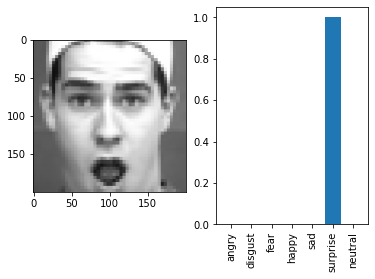

Expression Prediction: surprise


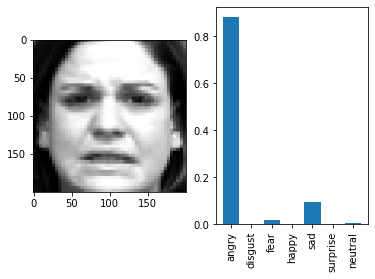

Expression Prediction: angry


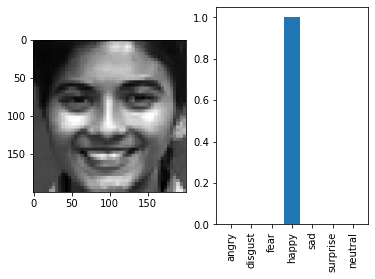

Expression Prediction: happy


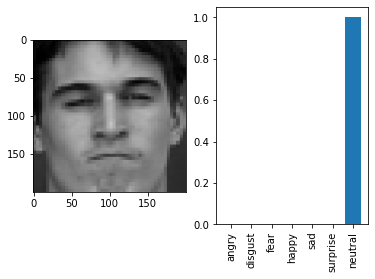

Expression Prediction: neutral


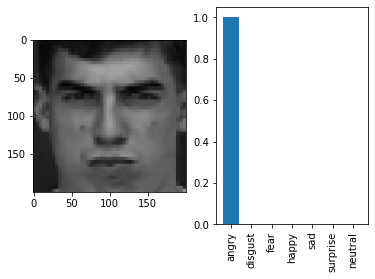

Expression Prediction: angry


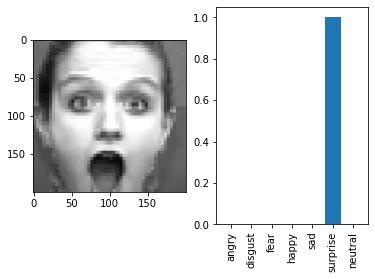

Expression Prediction: surprise


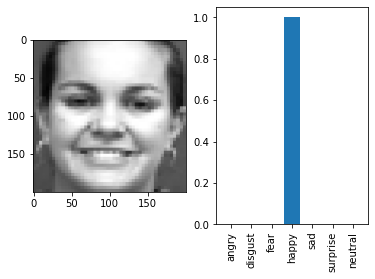

Expression Prediction: happy


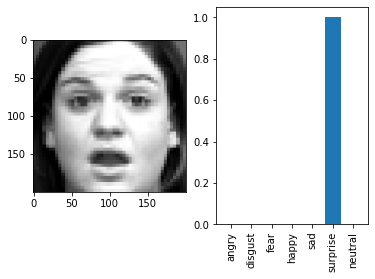

Expression Prediction: surprise


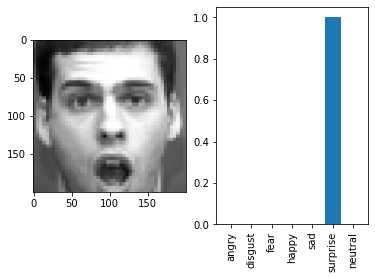

Expression Prediction: surprise


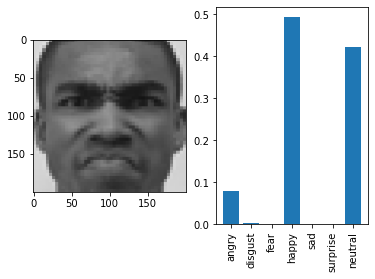

Expression Prediction: happy


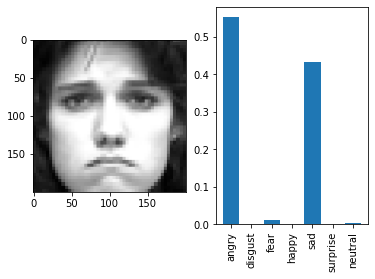

Expression Prediction: angry


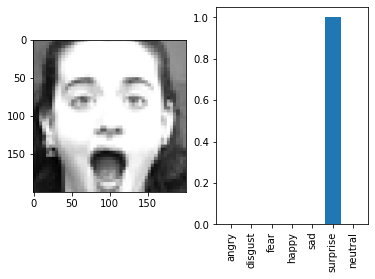

Expression Prediction: surprise


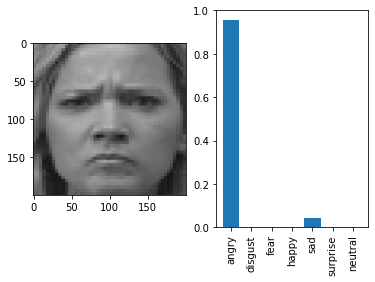

Expression Prediction: angry


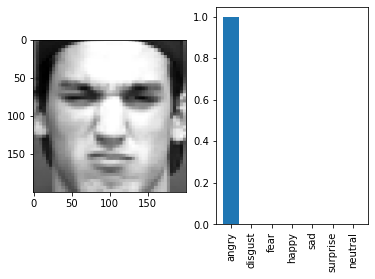

Expression Prediction: angry


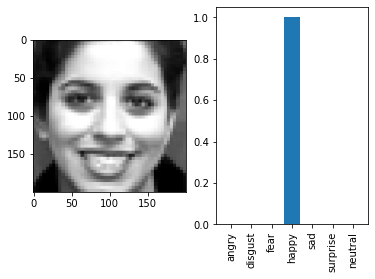

Expression Prediction: happy


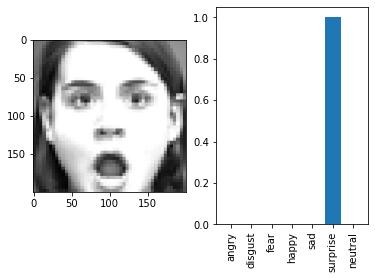

Expression Prediction: surprise


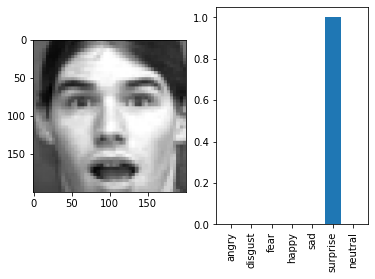

Expression Prediction: surprise


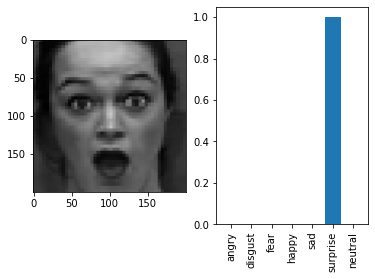

Expression Prediction: surprise


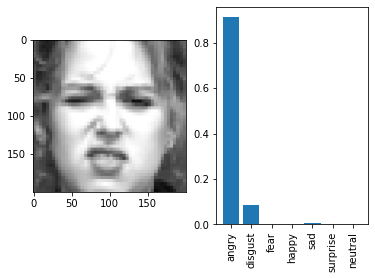

Expression Prediction: angry


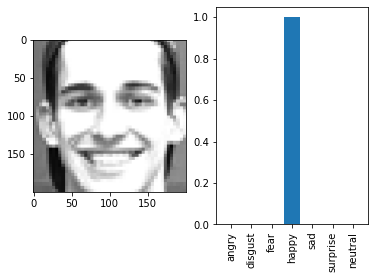

Expression Prediction: happy


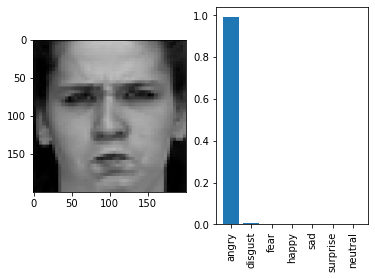

Expression Prediction: angry


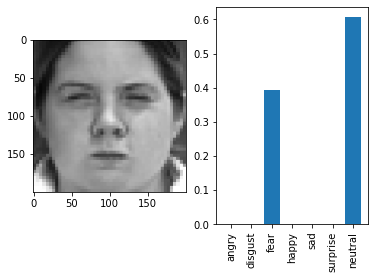

Expression Prediction: neutral


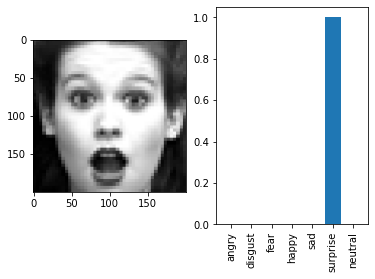

Expression Prediction: surprise


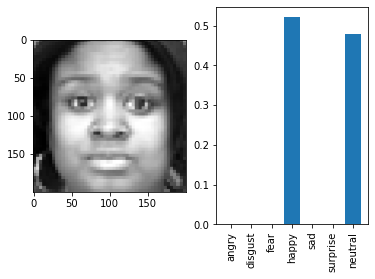

Expression Prediction: happy


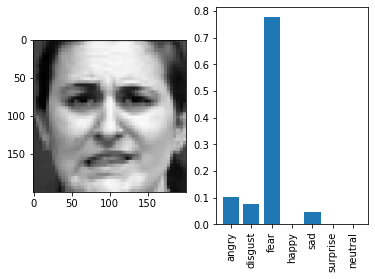

Expression Prediction: fear


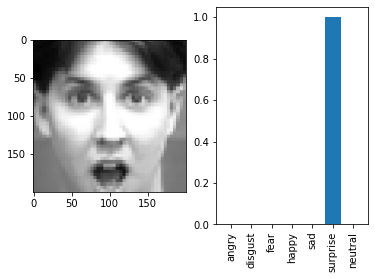

Expression Prediction: surprise


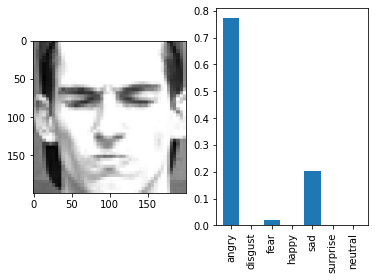

Expression Prediction: angry


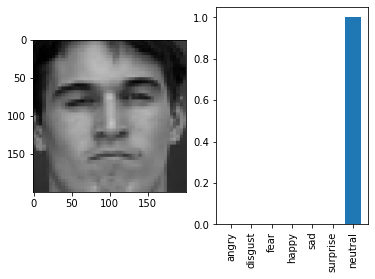

Expression Prediction: neutral


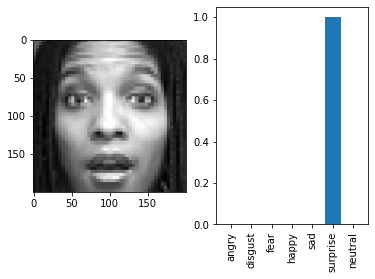

Expression Prediction: surprise


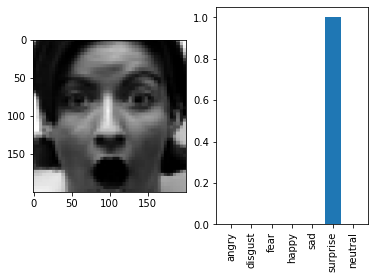

Expression Prediction: surprise


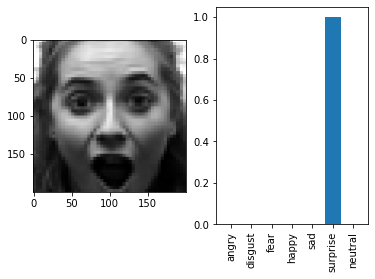

Expression Prediction: surprise


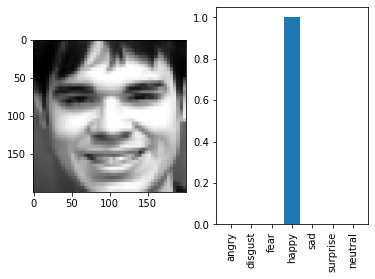

Expression Prediction: happy


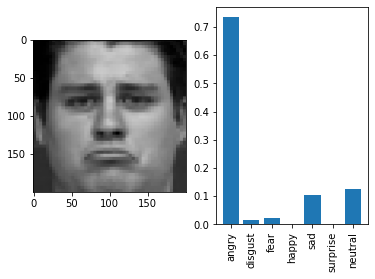

Expression Prediction: angry


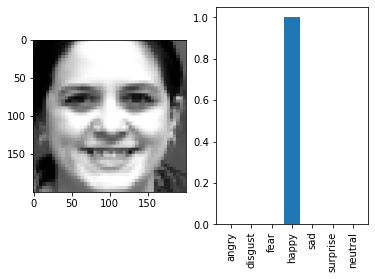

Expression Prediction: happy


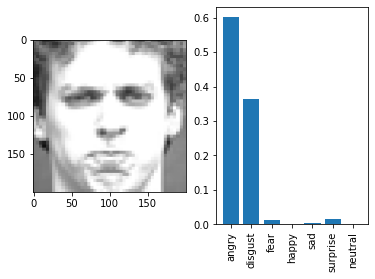

Expression Prediction: angry


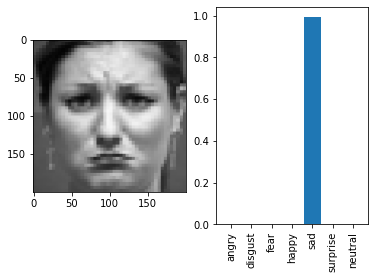

Expression Prediction: sad


In [25]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
for i in range(0, 180):
    randimg = random.choice(os.listdir("./CK+48"))
    randimgpath = "./CK+48/" + randimg
    img = image.load_img(randimgpath, grayscale=True, target_size=(48, 48))
    show_img=image.load_img(randimgpath, grayscale=False, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);
    
    plt.gray()
    plt.subplot(1,2,1)
    plt.imshow(show_img)
    
    plt.subplot(1,2,2)
    plt.bar(objects,custom[0])
    plt.xticks(rotation=90)
    
    plt.show()

    a=custom[0]
    m=a[0]
    for i in range(0,len(a)):
        if a[i]>=m:
            m=a[i]
            ind=i

    print('Expression Prediction:',objects[ind])

   